In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Import data

In [2]:
df = pd.read_excel('ExerciseSAClass.xlsx')
df.head()

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate
0,CgXDOaQDvGm,“I have decided that the global #monkeypox out...,07/23/2022,English,“I have decided that the global #monkeypox out...,neutral,Not Hate
1,CgXpRmMIdzG,In light of the evolving monkeypox outbreak wi...,07/23/2022,English,In light of the evolving monkeypox outbreak wi...,neutral,Not Hate
2,CgXaFGDsevq,If you've been hearing about monkeypox and wan...,07/23/2022,English,If you've been hearing about monkeypox and wan...,neutral,Not Hate
3,CgXGNrmLwoL,Monkeypox is a rare disease caused by infectio...,07/23/2022,English,Monkeypox is a rare disease caused by infectio...,neutral,Not Hate
4,CgXTqcjOQD-,For today's @newyorkermag dispatch. \n'The Ago...,07/23/2022,English,For today's @newyorkermag dispatch. \n'The Ago...,negative,Not Hate


# Filter data

In [3]:
print("Original dataset size:", len(df))
df_English = df[df['Language'] == 'English']
df_English = df_English[['Post description', 'Language', 'Sentiment']]
print("Dataset size after filtering for English:", len(df_English))
df_English.head()


Original dataset size: 35719
Dataset size after filtering for English: 22358


,Post description,Language,Sentiment
0,“I have decided that the global #monkeypox out...,English,neutral
1,In light of the evolving monkeypox outbreak wi...,English,neutral
2,If you've been hearing about monkeypox and wan...,English,neutral
3,Monkeypox is a rare disease caused by infectio...,English,neutral
4,For today's @newyorkermag dispatch. \n'The Ago...,English,negative


# Preprocessing

In [4]:
English_stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    tokens = word_tokenize(text)  
    tokens = [token for token in tokens if token not in English_stopwords]
    return ' '.join(tokens)  

df_English.loc[:, 'processed_text'] = df_English['Post description'].apply(preprocess_text)

df_English[['Post description', 'processed_text']].head()

,Post description,processed_text
0,“I have decided that the global #monkeypox out...,decided global monkeypox outbreak represents p...
1,In light of the evolving monkeypox outbreak wi...,light evolving monkeypox outbreak reported cas...
2,If you've been hearing about monkeypox and wan...,youve hearing monkeypox want learn scroll find...
3,Monkeypox is a rare disease caused by infectio...,monkeypox rare disease caused infection monkey...
4,For today's @newyorkermag dispatch. \n'The Ago...,todays newyorkermag dispatch agony early case ...


In [5]:
df_English

,Post description,Language,Sentiment,processed_text
0,“I have decided that the global #monkeypox out...,English,neutral,decided global monkeypox outbreak represents p...
1,In light of the evolving monkeypox outbreak wi...,English,neutral,light evolving monkeypox outbreak reported cas...
2,If you've been hearing about monkeypox and wan...,English,neutral,youve hearing monkeypox want learn scroll find...
3,Monkeypox is a rare disease caused by infectio...,English,neutral,monkeypox rare disease caused infection monkey...
4,For today's @newyorkermag dispatch. \n'The Ago...,English,negative,todays newyorkermag dispatch agony early case ...
...,...,...,...,...
35679,"يسعدني أن أشارك أحدث ورقتي المنشورة بعنوان ""تف...",English,positif,mpox mpox monkypox africa outbreak vaccine sur...
35682,Navigating Kenya’s Telecom Shakeup: Key Insigh...,English,neutral,navigating kenyas telecom shakeup key insights...
35685,@escrs @aaoeye @aimo_oculisti @medicitalia.it ...,English,neutral,escrs aaoeye aimooculisti medicitaliait summar...
35689,"Finally, a shot at control: Congo receives cru...",English,neutral,finally shot control congo receives crucial mp...


dapat dilihat data masih memiliki kekurangan karna pada label English, isi post description ada bahasa lain.

In [6]:
sentiment_map = {'neutral': 0, 'negative': 1, 'positif': 2}
df_English['sentiment_numeric'] = df_English['Sentiment'].map(sentiment_map)

df_English = df_English.dropna(subset=['processed_text', 'sentiment_numeric'])
print("Dataset size after removing NaN values:", len(df_English))


Dataset size after removing NaN values: 22358


# Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_English['processed_text'], df_English['sentiment_numeric'], test_size=0.2, random_state=42)

# TF-IDF

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Modelling Rendom Forest


Random Forest:
Accuracy: 0.8671735241502684
Precision: 0.86
Recall: 0.87
F1-score: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      3531
           1       0.83      0.36      0.50       341
           2       0.80      0.50      0.61       600

    accuracy                           0.87      4472
   macro avg       0.83      0.61      0.68      4472
weighted avg       0.86      0.87      0.85      4472



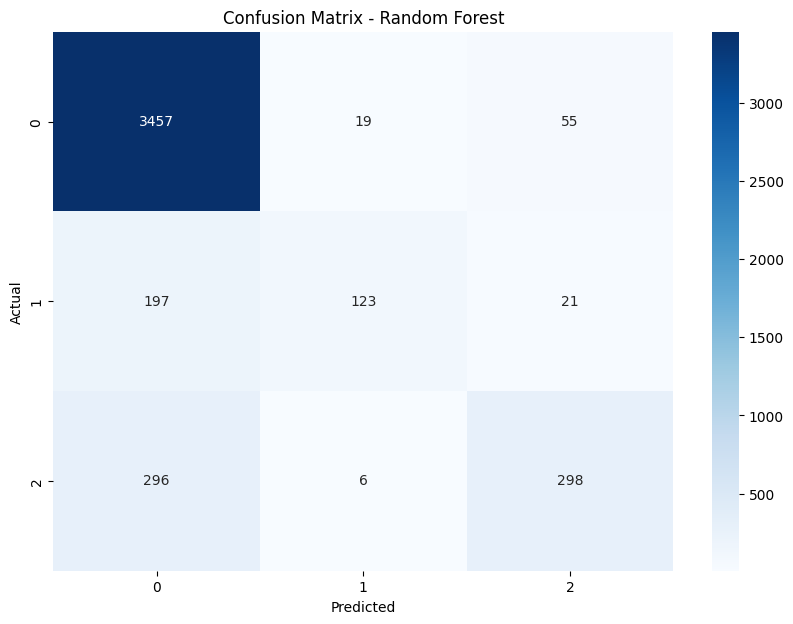

In [9]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = rf_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest:")
print("Accuracy:", accuracy)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
incorrect_indices = np.where(y_test != y_pred_rf)[0]
incorrect_predictions = y_pred_rf[incorrect_indices]
actual_labels = y_test.iloc[incorrect_indices]

for i in range(len(incorrect_indices)):
    text = df_English['Post description'].iloc[incorrect_indices[i]]
    print(f"Text: {text}")
    print(f"Predicted: {incorrect_predictions[i]}, Actual: {actual_labels.iloc[i]}")
    print("-----")


Text: In light of the evolving monkeypox outbreak with over 16,000 reported cases from 75 countries and territories, I reconvened the emergency committee. Based on the International Health Regulations criteria, I decided to declare this outbreak a Public Health Emergency of International Concern. 

The outbreak has spread around the world rapidly, through new modes of transmission, about which we understand too little.
Predicted: 0, Actual: 2
-----
Text: For today's @newyorkermag dispatch. 
'The Agony of an Early Case of Monkeypox' about the writer's friend’s experience revealing a shocking lack of awareness and preparation to counter the spread of the virus in the U.S.

I drew a restful, healing figure in repose, with many small figures all rejoicing over its skin, symbolizing, agony, pain, disease but also togetherness, celebration and positif. Want to also share some drafts. 

Deep thanks to AD @iguessnick and get vaccinated everyone <3
Predicted: 0, Actual: 1
-----
Text: Some snaps

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\2369132415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


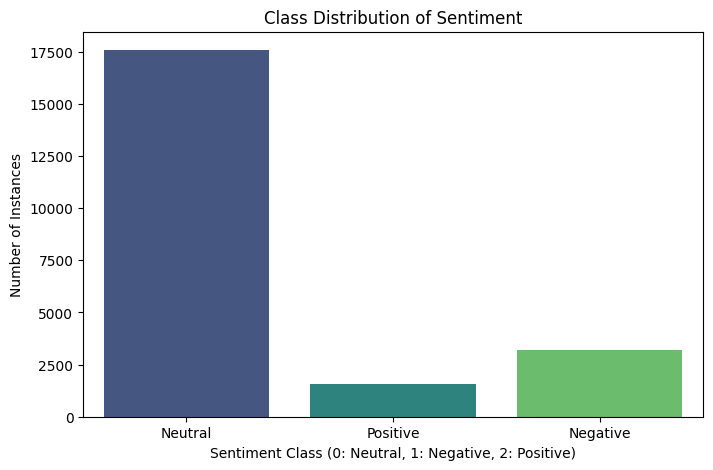

In [23]:
import seaborn as sns

class_counts = df_English['sentiment_numeric'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution of Sentiment')
plt.xlabel('Sentiment Class (0: Neutral, 1: Negative, 2: Positive)')
plt.ylabel('Number of Instances')
plt.xticks(ticks=class_counts.index, labels=['Neutral', 'Negative', 'Positive'])
plt.show()

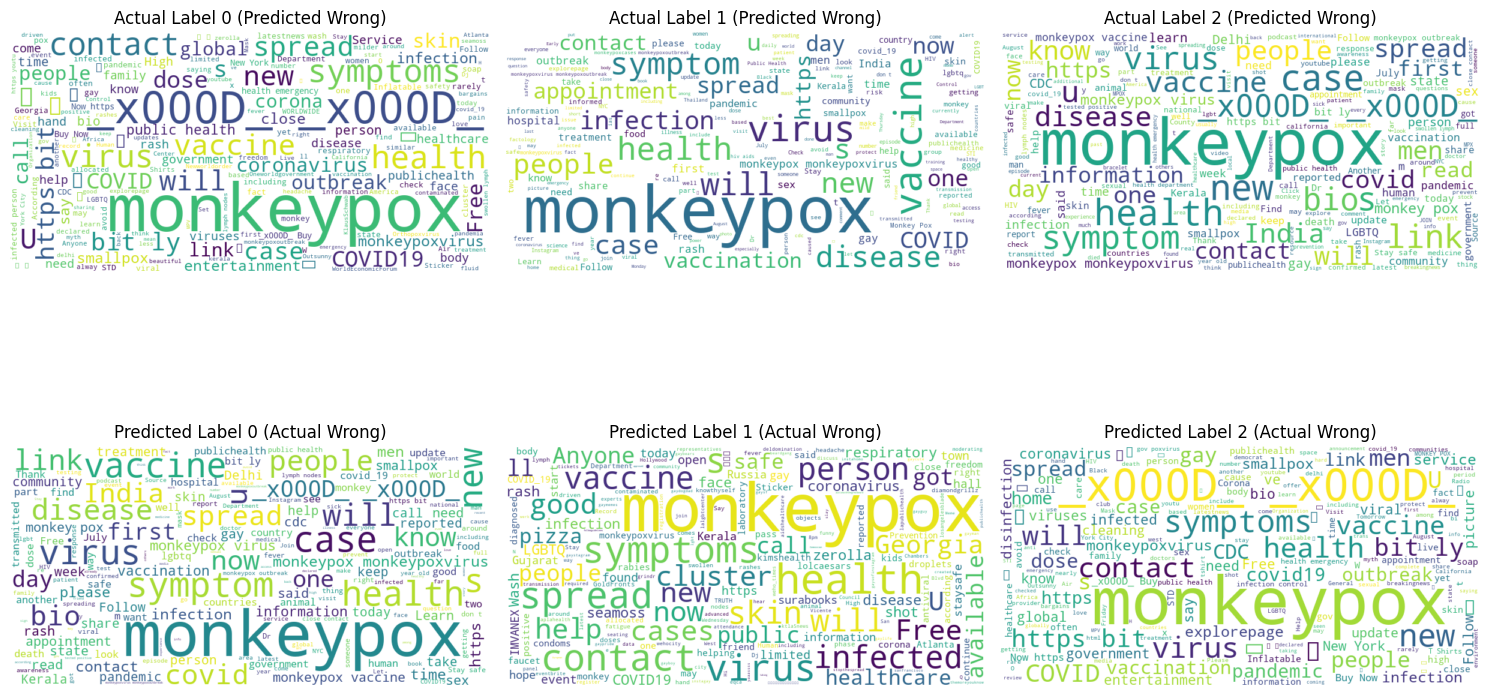

In [21]:
from wordcloud import WordCloud

incorrect_indices = np.where(y_test != y_pred_rf)[0]
actual_labels = y_test.iloc[incorrect_indices]

incorrect_grouped_actual = {0: [], 1: [], 2: []}
incorrect_grouped_predicted = {0: [], 1: [], 2: []}

for i in range(len(incorrect_indices)):
    predicted_label = y_pred_rf[incorrect_indices[i]]
    actual_label = actual_labels.iloc[i]
    text = df_English['Post description'].iloc[incorrect_indices[i]]

    incorrect_grouped_actual[actual_label].append(text)
    
    incorrect_grouped_predicted[predicted_label].append(text)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  

for ax, (label, texts) in zip(axes[0], incorrect_grouped_actual.items()):
    if texts:  
        text_combined = ' '.join(texts)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
        
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'Actual Label {label} (Predicted Wrong)')

for ax, (label, texts) in zip(axes[1], incorrect_grouped_predicted.items()):
    if texts:  
        text_combined = ' '.join(texts)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
        
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'Predicted Label {label} (Actual Wrong)')

plt.tight_layout()
plt.show()